In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [239]:
# Loading the Customer Address Data from the excel file

cust_address = pd.read_excel(r"C:\Users\ashok\Downloads\Raw_data.xlsx" , sheet_name='CustomerAddress')

In [240]:
# Checking first 5 records from Customer Address Data

cust_address.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [241]:
# Information of columns and data-types of Customer Address Data.

cust_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [242]:

print("Total records (rows) in the dataset : {}".format(cust_address.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_address.shape[1]))

Total records (rows) in the dataset : 3999
Total columns (features) in the dataset : 6


In [243]:
# select numeric columns
df_numeric = cust_address.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = cust_address.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are  : {}".format(non_numeric_cols))

The numeric columns are : ['customer_id' 'postcode' 'property_valuation']
The non-numeric columns are  : ['address' 'state' 'country']


In [244]:
# Total number of missing values
cust_address.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [245]:
cust_address['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [246]:
# Function to replace full state names with their short forms.

def replace_state_names(state_name):
    
    # Making Short Form of State Names as standards
    if state_name=='New South Wales':
        return 'NSW'
    elif state_name=='Victoria':
        return 'VIC'
    else :
        return state_name

# Applying the above fuction to state column
cust_address['state'] = cust_address['state'].apply(replace_state_names)

In [247]:
cust_address['state'].value_counts()


state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [248]:
cust_address['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

In [249]:
cust_address[['address','postcode', 'state' , 'country']].drop_duplicates()

,address,postcode,state,country
0,060 Morning Avenue,2016,NSW,Australia
1,6 Meadow Vale Court,2153,NSW,Australia
2,0 Holy Cross Court,4211,QLD,Australia
3,17979 Del Mar Point,2448,NSW,Australia
4,9 Oakridge Court,3216,VIC,Australia
...,...,...,...,...
3994,1482 Hauk Trail,3064,VIC,Australia
3995,57042 Village Green Point,4511,QLD,Australia
3996,87 Crescent Oaks Alley,2756,NSW,Australia
3997,8194 Lien Street,4032,QLD,Australia


In [250]:
# Dropping the primary key column i.e customer_id and storing into a temporary dataframe.
cust_address_dedupped = cust_address.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_address_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_address.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3999
Number of records in original dataset : 3999


In [251]:
cust_address.to_csv(r"C:\Users\ashok\Downloads\CustomerAddress_Cleaned.csv", index=False)


In [252]:
cust_demo_detail = pd.read_csv(r"C:\Users\ashok\Downloads\CustomerDemographic_Cleaned.csv")


In [253]:
cust_demo_detail.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,67
3,4,Talbot,NaN,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,59
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,44


In [254]:
print("Total Records in Customer_Demographic_Table : {}".format(cust_demo_detail.shape[0]))
print("Total Records in Customer_Address_Table : {}".format(cust_address.shape[0]))
print('In Demographic Table {} records are getting dropped due to data cleaning process in Demographic Table'
      .format(cust_address.shape[0]-cust_demo_detail.shape[0]))

Total Records in Customer_Demographic_Table : 3912
Total Records in Customer_Address_Table : 3999
In Demographic Table 87 records are getting dropped due to data cleaning process in Demographic Table


In [255]:
cust_drop = cust_address.merge(cust_demo_detail , left_on = 'customer_id', right_on='customer_id'
                     , how='outer')
cust_drop.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,060 Morning Avenue,2016.0,NSW,Australia,10.0,Laraine,Medendorp,Female,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67.0
1,2,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40.0
2,4,0 Holy Cross Court,4211.0,QLD,Australia,9.0,Talbot,NaN,Male,33.0,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,59.0
3,5,17979 Del Mar Point,2448.0,NSW,Australia,4.0,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,44.0
4,6,9 Oakridge Court,3216.0,VIC,Australia,9.0,Curr,Duckhouse,Male,35.0,1966-09-16,Missing,Retail,High Net Worth,N,Yes,13.0,54.0


In [256]:
cust_demo = pd.read_excel(r"C:\Users\ashok\Downloads\Raw_data.xlsx" , sheet_name='CustomerDemographic')

In [257]:
cust_demo.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [258]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [259]:
print("Total records (rows) in the dataset : {}".format(cust_demo.shape[0]))
print("Total columns (features) in the dataset : {}".format(cust_demo.shape[1]))

Total records (rows) in the dataset : 4000
Total columns (features) in the dataset : 13


In [260]:
# select numeric columns
df_numeric = cust_demo.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = cust_demo.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['customer_id' 'past_3_years_bike_related_purchases' 'tenure']
The non-numeric columns are : ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'default'
 'owns_car']


In [261]:
# Dropping the default column

cust_demo.drop(labels={'default'}, axis=1 , inplace=True)

In [262]:
cust_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [263]:
cust_demo.isnull().mean()*100


customer_id                             0.000
first_name                              0.000
last_name                               3.125
gender                                  0.000
past_3_years_bike_related_purchases     0.000
DOB                                     2.175
job_title                              12.650
job_industry_category                  16.400
wealth_segment                          0.000
deceased_indicator                      0.000
owns_car                                0.000
tenure                                  2.175
dtype: float64

In [264]:
# Checking for the presence of first name and customer id in records where last name is missing.

cust_demo[cust_demo['last_name'].isnull()][['first_name', 'customer_id']].isnull().sum()

first_name     0
customer_id    0
dtype: int64

In [265]:
cust_demo[cust_demo['last_name'].isnull()]


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7.0
66,67,Vernon,NaN,Male,67,1960-06-14 00:00:00,Web Developer II,Retail,Mass Customer,N,No,18.0
105,106,Glyn,NaN,Male,54,1966-07-03 00:00:00,Software Test Engineer III,Health,High Net Worth,N,Yes,18.0
138,139,Gar,NaN,Male,1,1964-07-28 00:00:00,Operator,Telecommunications,Affluent Customer,N,No,4.0
196,197,Avis,NaN,Female,32,1977-01-27 00:00:00,NaN,NaN,High Net Worth,N,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3884,3885,Asher,NaN,Male,55,1978-06-17 00:00:00,Actuary,Financial Services,Mass Customer,N,Yes,8.0
3915,3916,Myrtia,NaN,Female,31,1958-10-17 00:00:00,NaN,Retail,Affluent Customer,N,Yes,17.0
3926,3927,Conway,NaN,Male,29,1978-01-07 00:00:00,Electrical Engineer,Manufacturing,Mass Customer,N,Yes,7.0
3961,3962,Benoit,NaN,Male,17,1977-10-06 00:00:00,Project Manager,Argiculture,High Net Worth,N,Yes,14.0


In [266]:
cust_demo['last_name'].fillna('None',axis=0, inplace=True)


In [267]:
cust_demo['last_name'].isnull().sum()


0

In [268]:
cust_demo[cust_demo['DOB'].isnull()]


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaN,Environmental Tech,IT,Mass Customer,N,No,NaN
167,168,Reggie,Broggetti,U,8,NaN,General Manager,IT,Affluent Customer,N,Yes,NaN
266,267,Edgar,Buckler,U,53,NaN,NaN,IT,High Net Worth,N,No,NaN
289,290,Giorgio,Kevane,U,42,NaN,Senior Sales Associate,IT,Mass Customer,N,No,NaN
450,451,Marlow,Flowerdew,U,37,NaN,Quality Control Specialist,IT,High Net Worth,N,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaN,NaN,IT,Affluent Customer,N,No,NaN
3882,3883,Nissa,Conrad,U,35,NaN,Legal Assistant,IT,Mass Customer,N,No,NaN
3930,3931,Kylie,Epine,U,19,NaN,NaN,IT,High Net Worth,N,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaN,NaN,IT,High Net Worth,N,Yes,NaN


In [269]:
round(cust_demo['DOB'].isnull().mean()*100)


2

In [270]:
dob_index_drop = cust_demo[cust_demo['DOB'].isnull()].index
dob_index_drop

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [271]:
cust_demo.drop(index=dob_index_drop, inplace=True, axis=0)


In [272]:
cust_demo['DOB'].isnull().sum()


0

In [273]:
import datetime

cust_demo['DOB'] = pd.to_datetime(cust_demo['DOB'])

def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

cust_demo['Age'] = cust_demo['DOB'].apply(age)

C:\Users\ashok\AppData\Local\Temp\ipykernel_4072\633987306.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_demo['Age'], kde=False, bins=50)


<Axes: xlabel='Age'>

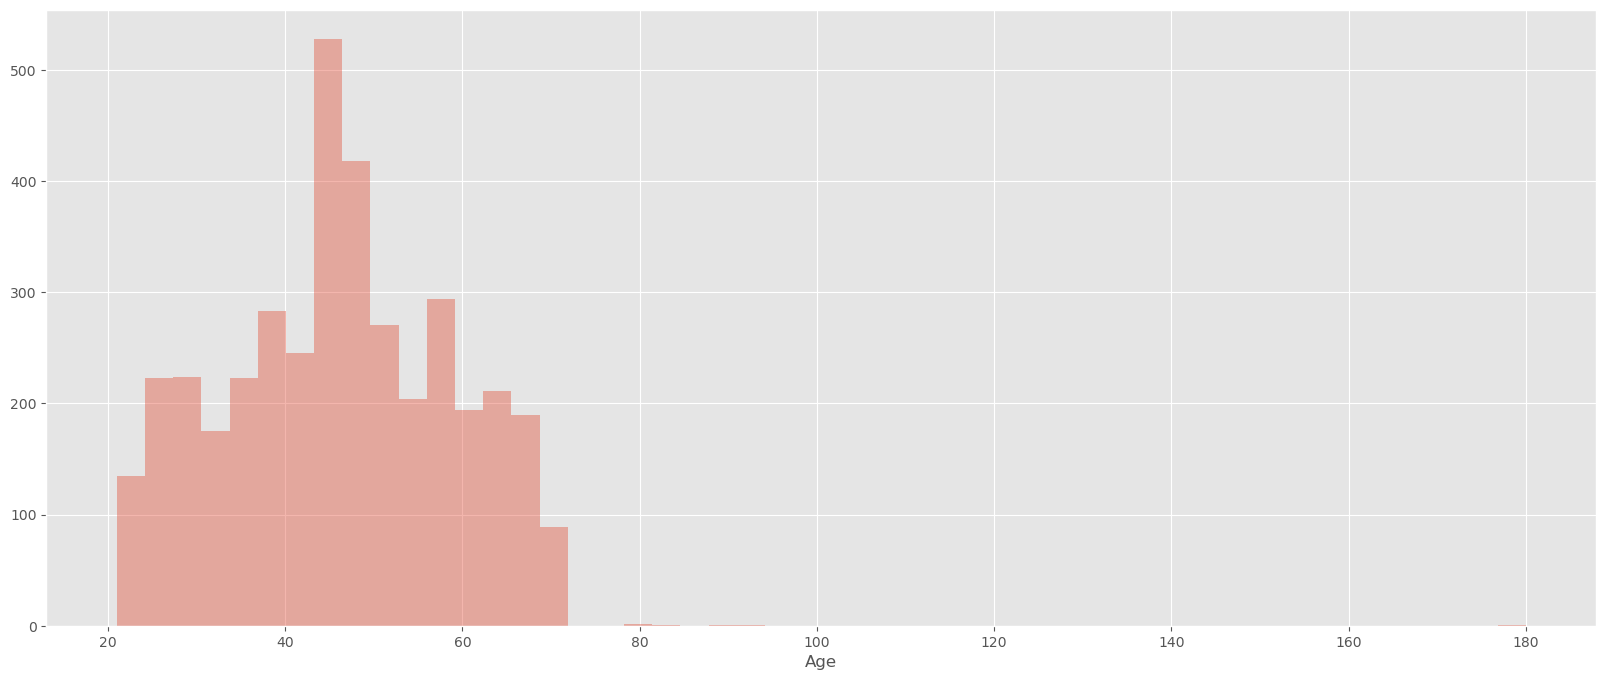

In [274]:
# Viz to find out the Age Distribution
plt.figure(figsize=(20,8))
sns.distplot(cust_demo['Age'], kde=False, bins=50)

In [275]:
cust_demo['Age'].describe()


count    3913.000000
mean       46.100690
std        12.797106
min        21.000000
25%        36.000000
50%        46.000000
75%        56.000000
max       180.000000
Name: Age, dtype: float64

In [276]:
cust_demo[cust_demo['Age'] > 100]


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,180


In [277]:
age_index_drop = cust_demo[cust_demo['Age']>100].index

cust_demo.drop(index=age_index_drop, inplace=True , axis=0)

In [278]:
cust_demo['tenure'].isnull().sum()


0

In [279]:
# Fetching records where Job Title is missing.

cust_demo[cust_demo['job_title'].isnull()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
3,4,Talbot,None,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,62
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,57
6,7,Fina,Merali,Female,6,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,11.0,47
10,11,Uriah,Bisatt,Male,99,1954-04-30,NaN,Property,Mass Customer,N,No,9.0,69
21,22,Deeanne,Durtnell,Female,79,1962-12-10,NaN,IT,Mass Customer,N,No,11.0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3968,Alexandra,Kroch,Female,99,1977-12-22,NaN,Property,High Net Worth,N,No,22.0,46
3971,3972,Maribelle,Schaffel,Female,6,1979-03-28,NaN,Retail,Mass Customer,N,No,8.0,44
3978,3979,Kleon,Adam,Male,67,1974-07-13,NaN,Financial Services,Mass Customer,N,Yes,18.0,49
3986,3987,Beckie,Wakeham,Female,18,1964-05-29,NaN,Argiculture,Mass Customer,N,No,7.0,59


In [280]:
cust_demo['job_title'].fillna('Missing', inplace=True, axis=0)


In [281]:
cust_demo['job_title'].isnull().sum()


0

In [282]:
cust_demo[cust_demo['job_industry_category'].isnull()]


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,46
7,8,Rod,Inder,Male,31,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,7.0,61
15,16,Harlin,Parr,Male,38,1977-02-27,Media Manager IV,NaN,Mass Customer,N,Yes,18.0,46
16,17,Heath,Faraday,Male,57,1962-03-19,Sales Associate,NaN,Affluent Customer,N,Yes,15.0,61
17,18,Marjie,Neasham,Female,79,1967-07-06,Professor,NaN,Affluent Customer,N,No,11.0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,3966,Astrix,Sigward,Female,53,1968-09-15,Geologist I,NaN,Mass Customer,N,Yes,11.0,55
3973,3974,Misha,Ranklin,Female,82,1961-02-11,Technical Writer,NaN,Affluent Customer,N,Yes,9.0,63
3975,3976,Gretel,Chrystal,Female,0,1957-11-20,Internal Auditor,NaN,Affluent Customer,N,Yes,13.0,66
3982,3983,Jarred,Lyste,Male,19,1965-04-21,Graphic Designer,NaN,Mass Customer,N,Yes,9.0,58


In [283]:
cust_demo['job_industry_category'].fillna('Missing', inplace=True, axis=0)


In [284]:
cust_demo['job_industry_category'].isnull().sum()


0

In [285]:
cust_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
Age                                    0
dtype: int64

In [286]:
print("Total records after removing Missing Values: {}".format(cust_demo.shape[0]))

Total records after removing Missing Values: 3912


In [287]:
cust_demo['gender'].value_counts()


gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

In [288]:
def replace_gender_names(gender):
    
    # Making Gender as Male and Female as standards
    if gender=='M':
        return 'Male'
    elif gender=='F':
        return 'Female'
    elif gender=='Femal':
        return 'Female'
    else :
        return gender

cust_demo['gender'] = cust_demo['gender'].apply(replace_gender_names)

In [289]:
cust_demo['gender'].value_counts()


gender
Female    2039
Male      1873
Name: count, dtype: int64

In [290]:
cust_demo['wealth_segment'].value_counts()


wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

In [291]:
cust_demo['deceased_indicator'].value_counts()


deceased_indicator
N    3910
Y       2
Name: count, dtype: int64

In [292]:
cust_demo['owns_car'].value_counts()


owns_car
Yes    1974
No     1938
Name: count, dtype: int64

In [293]:
cust_demo_dedupped = cust_demo.drop('customer_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(cust_demo_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(cust_demo.shape[0]))

Number of records after removing customer_id (pk), duplicates : 3912
Number of records in original dataset : 3912


In [294]:
cust_demo.to_csv('CustomerDemographic_Cleaned.csv', index=False)

In [295]:
new_cust = pd.read_excel(r"C:\Users\ashok\Downloads\Raw_data.xlsx" , sheet_name='NewCustomerList')


In [296]:
new_cust.head(5)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [297]:
new_cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [298]:
print("Total records (rows) in the dataset : {}".format(new_cust.shape[0]))
print("Total columns (features) in the dataset : {}".format(new_cust.shape[1]))

Total records (rows) in the dataset : 1000
Total columns (features) in the dataset : 23


In [299]:
# select numeric columns
df_numeric = new_cust.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


In [300]:
new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)


In [301]:
# Total number of missing values
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [302]:
# Percentage of missing values
new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

In [303]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()


first_name    0
dtype: int64

In [304]:
new_cust[new_cust['last_name'].isnull()]


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000


In [305]:
new_cust['last_name'].fillna('None',axis=0, inplace=True)


In [306]:
new_cust['last_name'].isnull().sum()


0

In [307]:
new_cust[new_cust['DOB'].isnull()]


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [308]:
round(new_cust['DOB'].isnull().mean()*100)


2

In [309]:
# Fetching the index of the records / rows where the DOB is null.

dob_index_drop = new_cust[new_cust['DOB'].isnull()].index
dob_index_drop

Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775, 835,
       883, 904, 984],
      dtype='int64')

In [310]:
new_cust.drop(index=dob_index_drop, inplace=True, axis=0)


In [311]:
new_cust['DOB'].isnull().sum()


0

In [312]:
# Function to find the age of customers as of today.

import datetime
new_cust['DOB'] = pd.to_datetime(new_cust['DOB'])

def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_cust['Age'] = new_cust['DOB'].apply(age)

In [313]:
new_cust['Age'].describe()


count    983.000000
mean      52.343845
std       17.061700
min       21.000000
25%       40.000000
50%       51.000000
75%       66.000000
max       85.000000
Name: Age, dtype: float64

C:\Users\ashok\AppData\Local\Temp\ipykernel_4072\2772827867.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age'], kde=False, bins=50)


<Axes: xlabel='Age'>

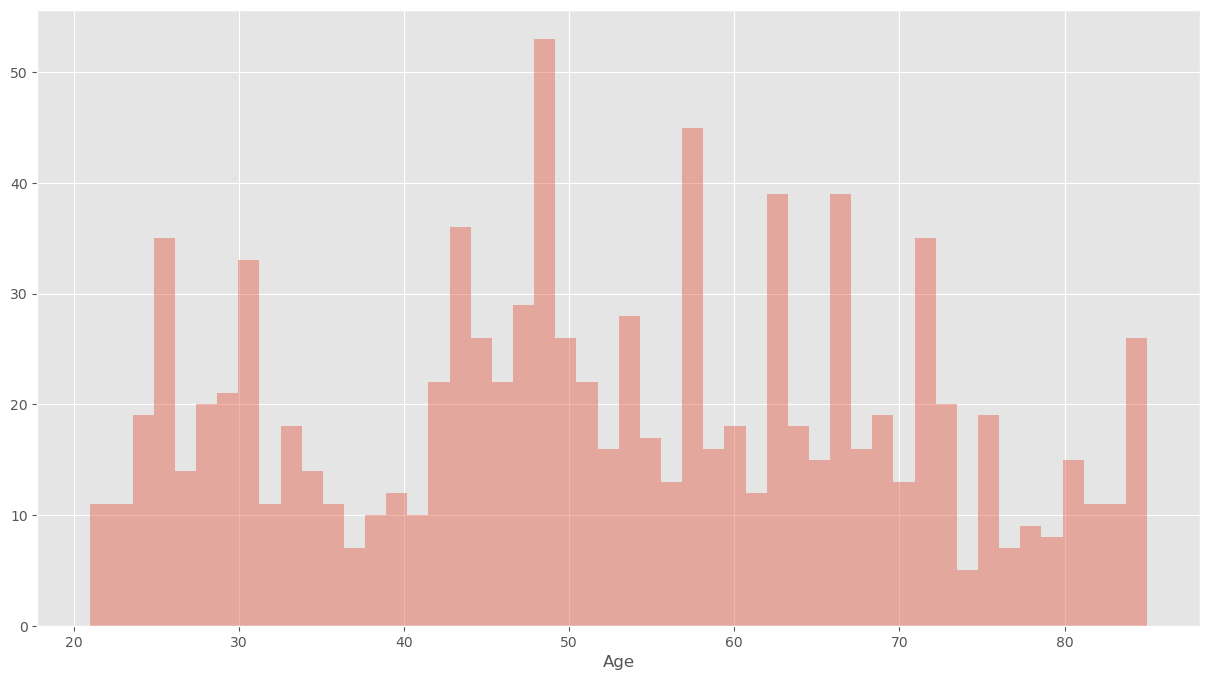

In [314]:
# Viz to find out the Age Distribution
plt.figure(figsize=(15,8))
sns.distplot(new_cust['Age'], kde=False, bins=50)

In [315]:
import math

new_cust['Age Group'] = new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)


C:\Users\ashok\AppData\Local\Temp\ipykernel_4072\31945810.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age Group'], kde=False, bins=50)


<Axes: xlabel='Age Group'>

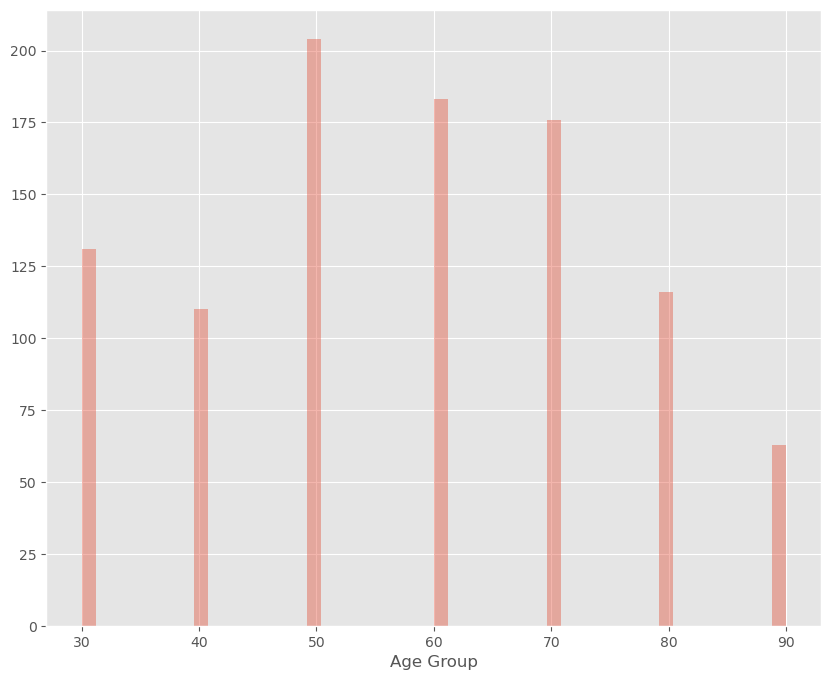

In [326]:
# Viz to find out the Age Group Distribution

plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age Group'], kde=False, bins=50)

In [327]:
new_cust[new_cust['job_title'].isnull()]


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group


In [318]:
new_cust['job_title'].fillna('Missing', inplace=True, axis=0)


In [319]:
new_cust['job_title'].isnull().sum()


0

In [320]:
new_cust[new_cust['job_industry_category'].isnull()]


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000,26,30
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000,46,50
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125,42,50
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656,55,60
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094,57,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000,57,60
971,Frieda,Tavinor,Female,43,1999-03-04,Missing,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,24,30
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000,55,60
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500,31,40


In [321]:
new_cust['job_industry_category'].fillna('Missing', inplace=True, axis=0)


In [322]:
new_cust['job_industry_category'].isnull().sum()


0

In [323]:
new_cust.isnull().sum()


first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Age Group                              0
dtype: int64

In [324]:
print("Total records after removing Missing Values: {}".format(new_cust.shape[0]))


Total records after removing Missing Values: 983


In [140]:
new_cust['gender'].value_counts()


gender
Female    513
Male      470
Name: count, dtype: int64

In [141]:
new_cust['wealth_segment'].value_counts()


wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

In [142]:
new_cust['deceased_indicator'].value_counts()


deceased_indicator
N    983
Name: count, dtype: int64

In [143]:
new_cust['owns_car'].value_counts()


owns_car
No     497
Yes    486
Name: count, dtype: int64

In [144]:
new_cust['state'].value_counts()


state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

In [145]:
new_cust['country'].value_counts()


country
Australia    983
Name: count, dtype: int64

In [146]:
new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')


,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


In [147]:
new_cust[['address', 'postcode','state','country']].sort_values('address')


,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


In [148]:
new_cust['tenure'].describe()


count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

C:\Users\ashok\AppData\Local\Temp\ipykernel_4072\3515310428.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

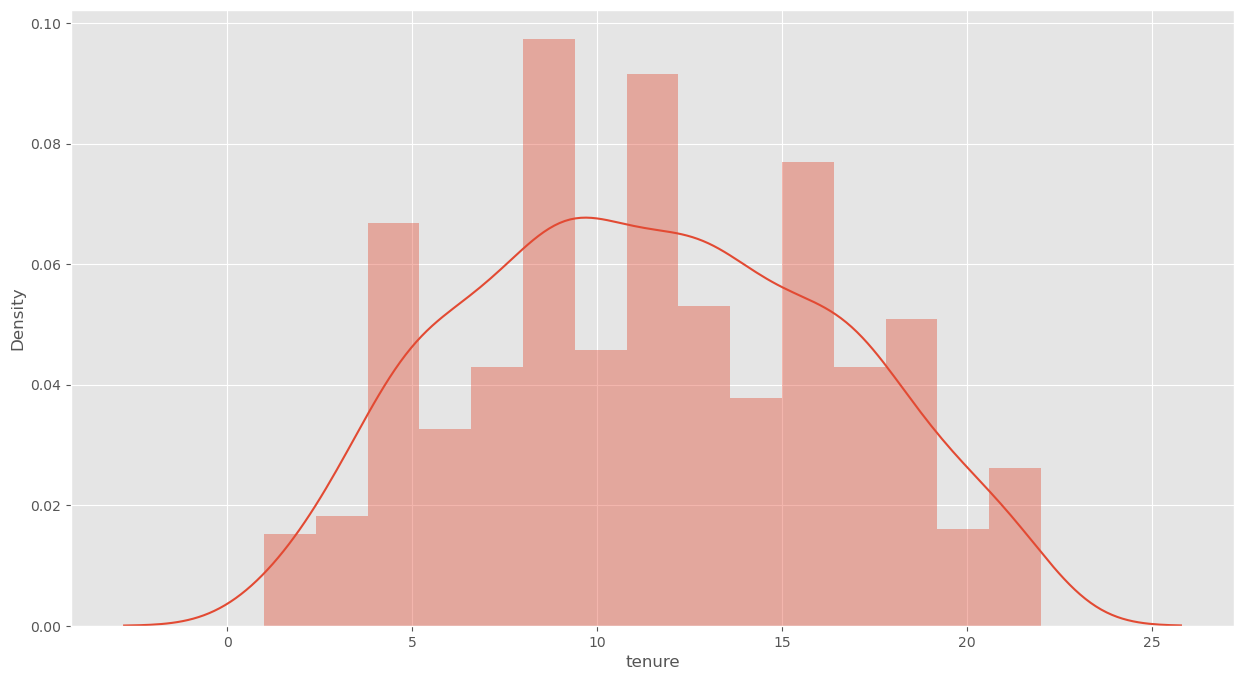

In [149]:
# Distributon of tenure

plt.figure(figsize=(15,8))
sns.distplot(new_cust['tenure'])

In [150]:
new_cust_dedupped = new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


In [151]:
new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)

In [152]:
trans = pd.read_excel(r"C:\Users\ashok\Downloads\Raw_data.xlsx" , sheet_name='Transactions')

In [153]:
trans.head(5)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [154]:
trans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [155]:
print("Total records (rows) in the dataset : {}".format(trans.shape[0]))
print("Total columns (features) in the dataset : {}".format(trans.shape[1]))

Total records (rows) in the dataset : 20000
Total columns (features) in the dataset : 13


In [156]:
# select numeric columns
df_numeric = trans.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = trans.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['transaction_id' 'product_id' 'customer_id' 'online_order' 'list_price'
 'standard_cost' 'product_first_sold_date']
The non-numeric columns are :
['transaction_date' 'order_status' 'brand' 'product_line' 'product_class'
 'product_size']


In [157]:
# Total number of missing values

trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [158]:
# Percentage of missing values

trans.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [159]:
trans[trans['online_order'].isnull()]


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,41345.0
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,41064.0
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,38002.0


In [160]:
most_freq_online_mode = trans['online_order'].mode()
most_freq_online_mode

0    1.0
Name: online_order, dtype: float64

In [161]:
trans['online_order'].fillna(1, inplace=True)


In [162]:
trans['online_order'].isnull().sum()


0

In [163]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].drop_duplicates()

,brand,product_line,product_class,product_size,standard_cost,product_first_sold_date
136,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].shape[0]

197

In [165]:
records_to_drop = trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 
                                'standard_cost', 'product_first_sold_date']].index
records_to_drop


Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [166]:
 trans.drop(index=records_to_drop, axis=0, inplace=True)


In [167]:
trans.isnull().sum()


transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [168]:
print("Total records after removing Missing Values: {}".format(trans.shape[0]))


Total records after removing Missing Values: 19803


In [169]:
trans['Profit'] = trans['list_price']-trans['standard_cost']


C:\Users\ashok\AppData\Local\Temp\ipykernel_4072\809017116.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trans['Profit'])


<Axes: xlabel='Profit', ylabel='Density'>

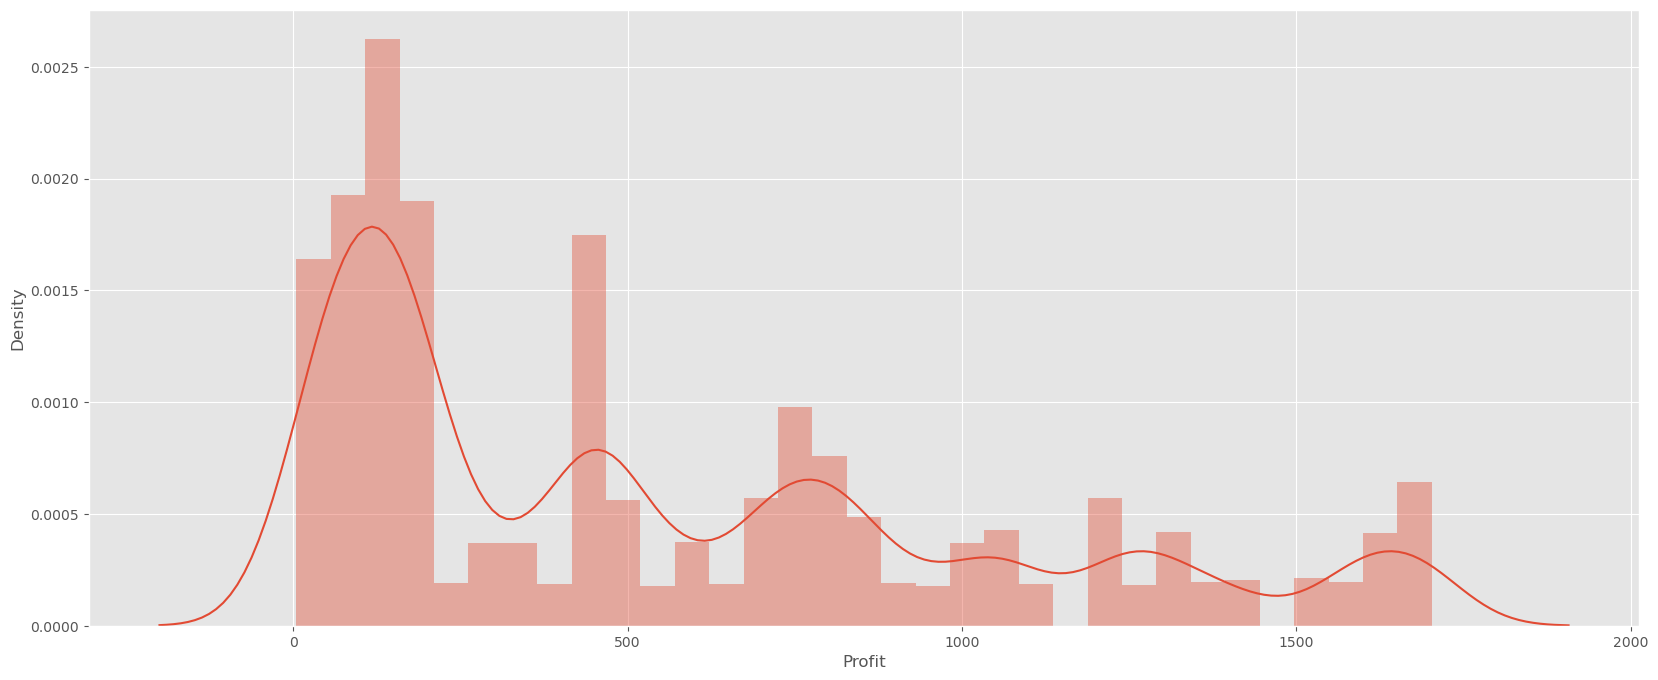

In [170]:
# Dystribution of the Profit Column

plt.figure(figsize=(20,8))
sns.distplot(trans['Profit'])

In [171]:
trans['online_order'].value_counts()


online_order
1.0    10097
0.0     9706
Name: count, dtype: int64

In [172]:
trans['order_status'].value_counts()


order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [173]:
trans[['order_status', 'online_order']].drop_duplicates()


,order_status,online_order
0,Approved,0.0
1,Approved,1.0
42,Cancelled,0.0
254,Cancelled,1.0


In [174]:
trans['product_line'].value_counts()


product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [175]:
trans['product_class'].value_counts()


product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [176]:
trans['product_size'].value_counts()


product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

In [177]:
trans['brand'].value_counts()


brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [178]:
trans_dedupped = trans.drop('transaction_id', axis=1).drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(trans_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(trans.shape[0]))

Number of records after removing customer_id (pk), duplicates : 19803
Number of records in original dataset : 19803


In [179]:
trans.to_csv('Transactions_Cleaned.csv', index=False)

In [180]:
trans = pd.read_csv(r"C:\Users\ashok\Transactions_Cleaned.csv")
cust = pd.read_csv(r"C:\Users\ashok\CustomerDemographic_Cleaned.csv")

In [181]:
trans.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [182]:
print("Total records (rows) in the Transaction Dataset : {}".format(trans.shape[0]))
print("Total features (columns) in the Transaction Dataset : {}".format(trans.shape[1]))

Total records (rows) in the Transaction Dataset : 19803
Total features (columns) in the Transaction Dataset : 14


In [183]:
cust.head(5)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,70
3,4,Talbot,NaN,Male,33,1961-10-03,Missing,IT,Mass Customer,N,No,7.0,62
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Missing,Affluent Customer,N,Yes,8.0,46


In [184]:
print("Total records (rows) in the Customer Demographics Dataset : {}".format(cust.shape[0]))
print("Total features (columns) in the Customer Demographics Dataset : {}".format(cust.shape[1]))

Total records (rows) in the Customer Demographics Dataset : 3912
Total features (columns) in the Customer Demographics Dataset : 13


In [185]:
# Merging both the Transaction Dataset and Customer Demographics Dataset based on customer_id.

merged_trans_cust = pd.merge(trans, cust, left_on='customer_id', right_on='customer_id', how='inner')

In [186]:
merged_trans_cust.head(5)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,69
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,45


In [187]:
print("Total records (rows) in the Merged Dataset : {}".format(merged_trans_cust.shape[0]))
print("Total features (columns) in the Merged Dataset : {}".format(merged_trans_cust.shape[1]))


Total records (rows) in the Merged Dataset : 19354
Total features (columns) in the Merged Dataset : 26


In [188]:
merged_trans_cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [189]:
merged_trans_cust['transaction_date']= pd.to_datetime(merged_trans_cust['transaction_date'])


In [190]:
# Maximum Transaction Date or the latest transaction date.

max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [192]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.

from datetime import datetime


comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")

In [193]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data. 

rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id), 
                                                            'Profit' : lambda p : sum(p)})

In [194]:
rfm_table.columns


Index(['transaction_date', 'product_id', 'Profit'], dtype='object')

In [195]:
# Renaming column names to appropiate names

rfm_table.rename(columns={'transaction_date' : 'recency', 
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)

In [196]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [197]:
# RFM_table dataset

rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [198]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)


In [199]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [200]:
# RFM table dataset

rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum
...,...,...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2,112,Bronze
3497,52,3,1648.32,2,1,1,211,Bronze
3498,127,6,3147.33,1,2,3,123,Bronze


In [201]:
cust_trans_rfm = pd.merge(merged_trans_cust, rfm_table, left_on='customer_id', right_on='customer_id', how='inner')


In [202]:
cust_trans_rfm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

In [203]:
cust_trans_rfm['Age_Group'] = cust_trans_rfm['Age'].apply(lambda x : (math.floor(x/10)+1)*10)


In [204]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):
    
    rfm_score = cols[0]
    
    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [205]:
# Applying the above functions and creating a new feature detail_cust_title

cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

In [206]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [207]:
# Applying the above functions and creating a new feature rank

cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_rank, axis=1)


In [208]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)


In [209]:
print("Total records in final dataset : {}".format(cust_trans_rfm.shape[0]))


Total records in final dataset : 19354


In [210]:
# Loading the New Customers Dataset

new_cust = pd.read_csv('NewCustomerList_Cleaned.csv')

C:\Users\ashok\AppData\Local\Temp\ipykernel_4072\992879090.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age Group'], kde=False, bins=15)


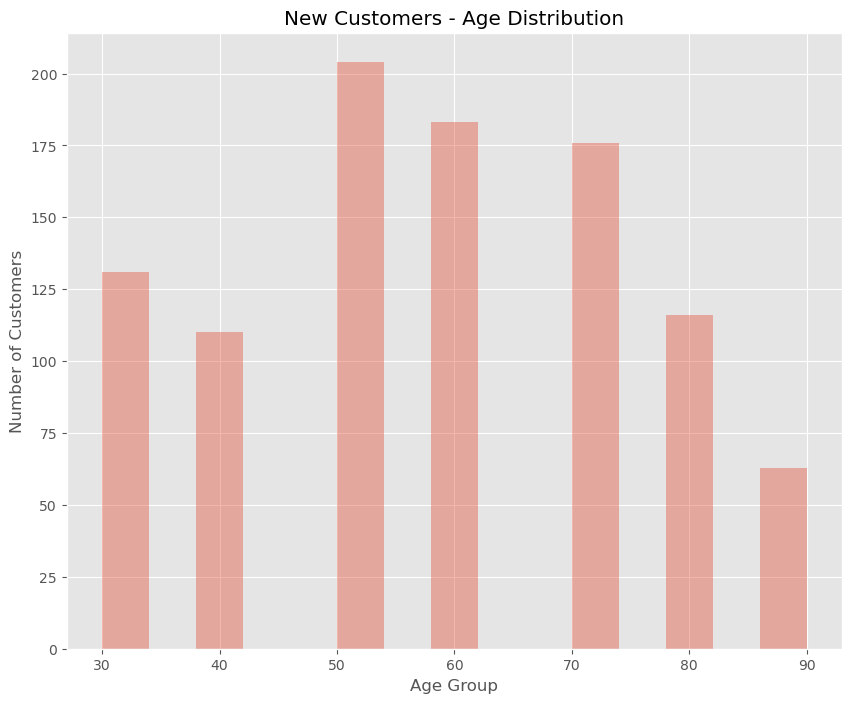

In [211]:
plt.figure(figsize=(10,8))
sns.distplot(new_cust['Age Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')

plt.show()


C:\Users\ashok\AppData\Local\Temp\ipykernel_4072\1382980942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_trans_rfm['Age_Group'], kde=False, bins=15)


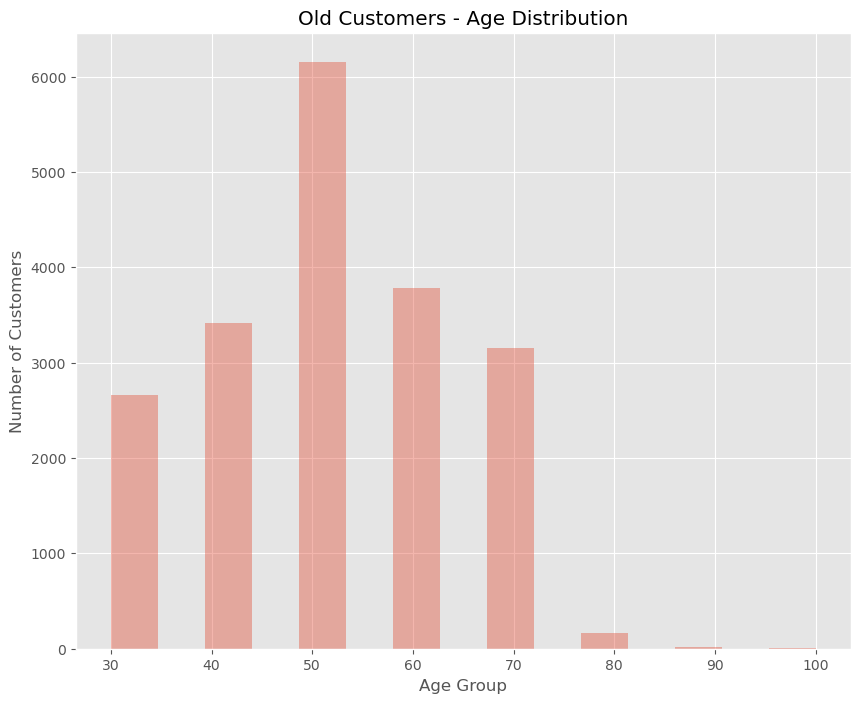

In [212]:
plt.figure(figsize=(10,8))
sns.distplot(cust_trans_rfm['Age_Group'], kde=False, bins=15)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')

plt.show()

In [213]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}
                                                                 ).reset_index()

In [214]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()


In [215]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100

In [216]:
cust_bike_purchase_by_gender


,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


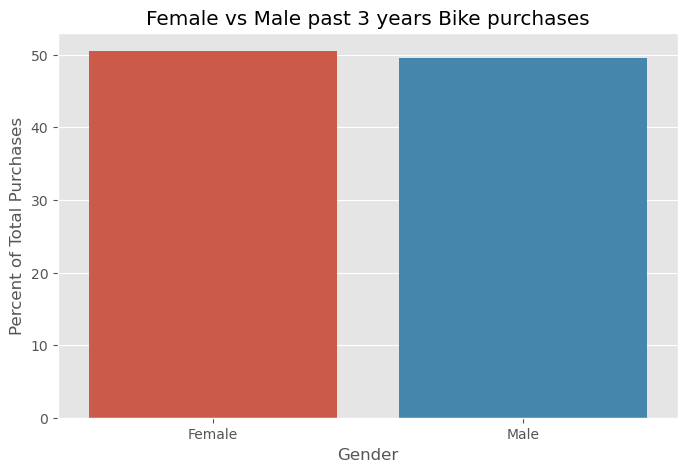

In [217]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender)
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

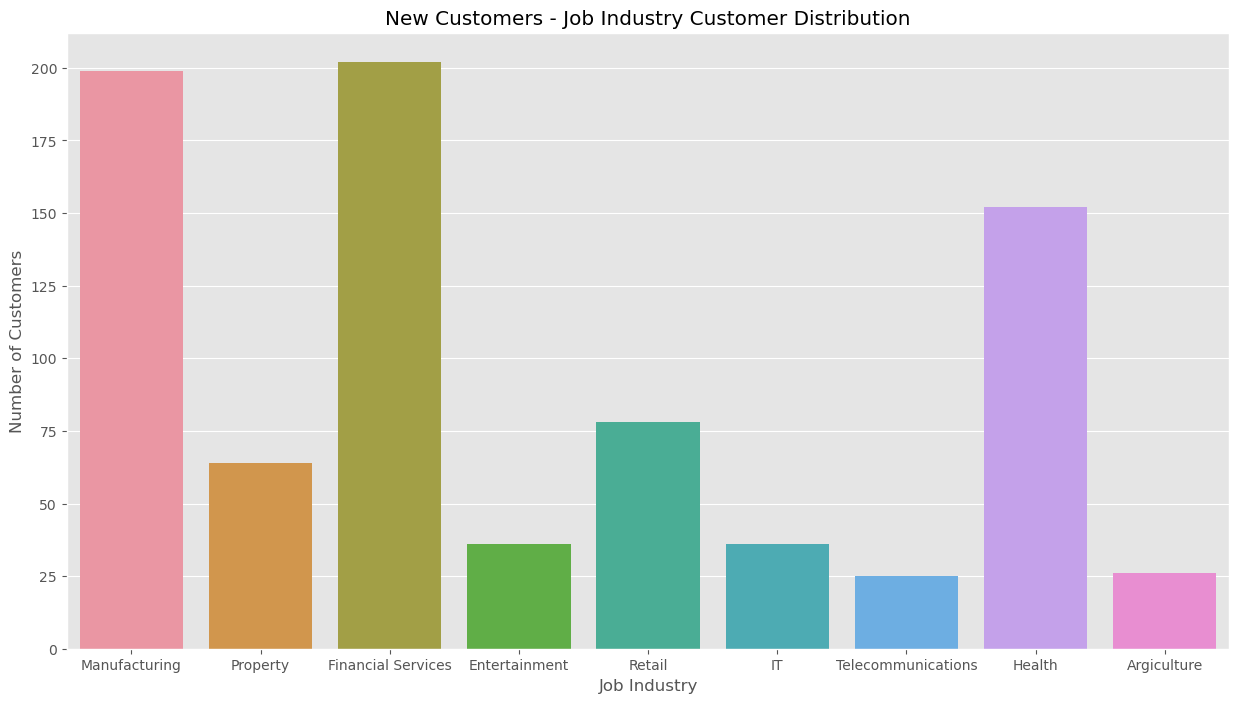

In [218]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=new_cust[~(new_cust['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')

plt.show()

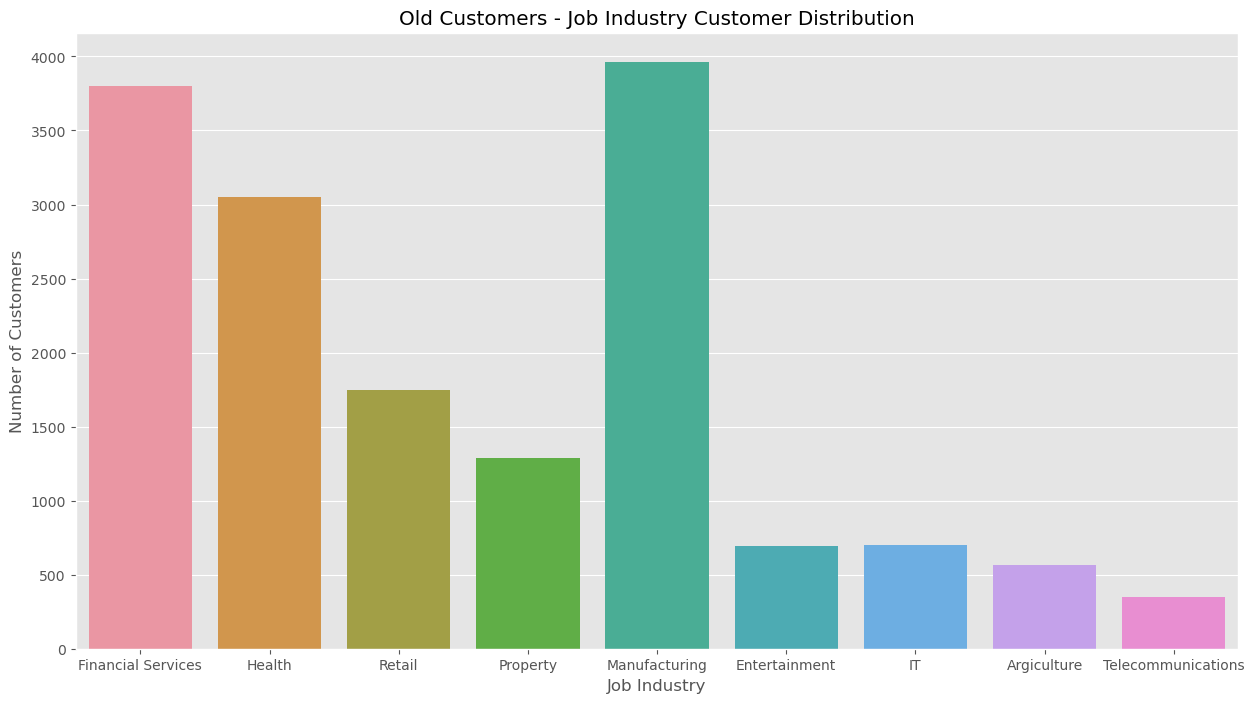

In [219]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')])
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')

plt.show()

In [220]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'Age Group']).size().reset_index()


In [221]:
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)
wealth_age_seg_new

,wealth_segment,Age Group,Number of Customers
0,Affluent Customer,30,41
1,Affluent Customer,40,20
2,Affluent Customer,50,50
3,Affluent Customer,60,46
4,Affluent Customer,70,35
5,Affluent Customer,80,30
6,Affluent Customer,90,13
7,High Net Worth,30,28
8,High Net Worth,40,36
9,High Net Worth,50,51


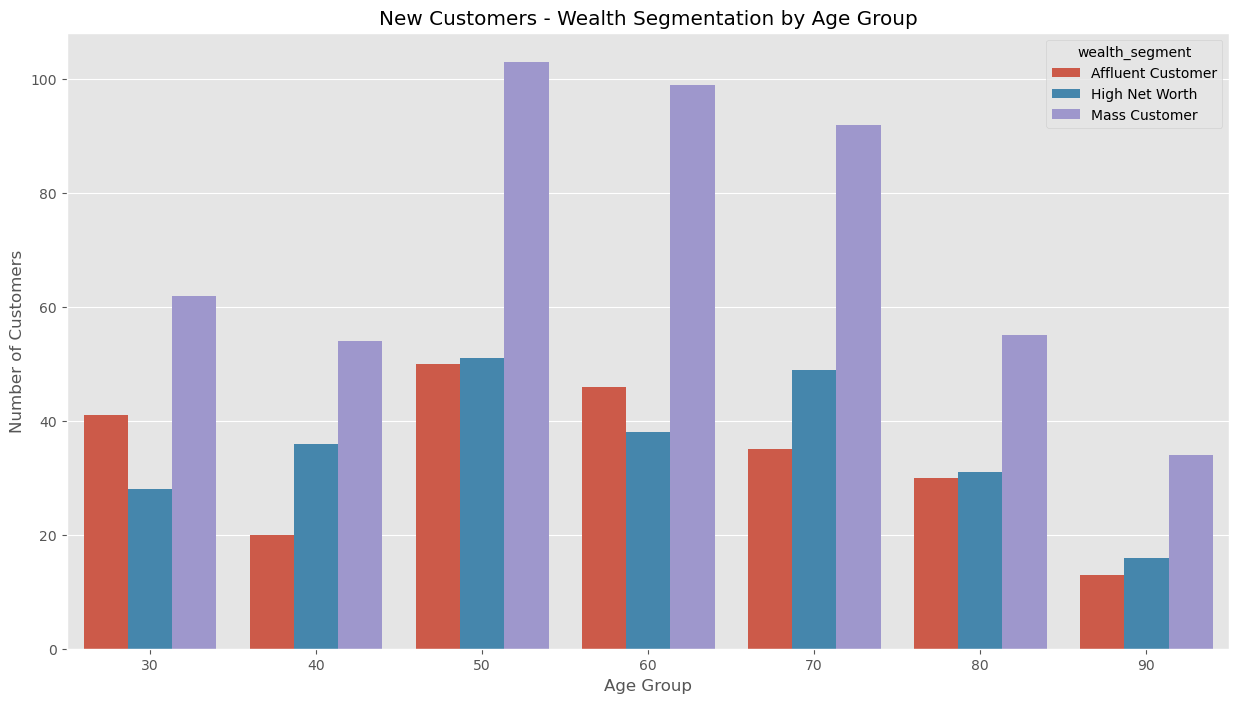

In [222]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

In [223]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'Age_Group']).size().reset_index()


In [224]:
wealth_age_seg_old.rename(columns={0:'Number of Customers'}, inplace=True)


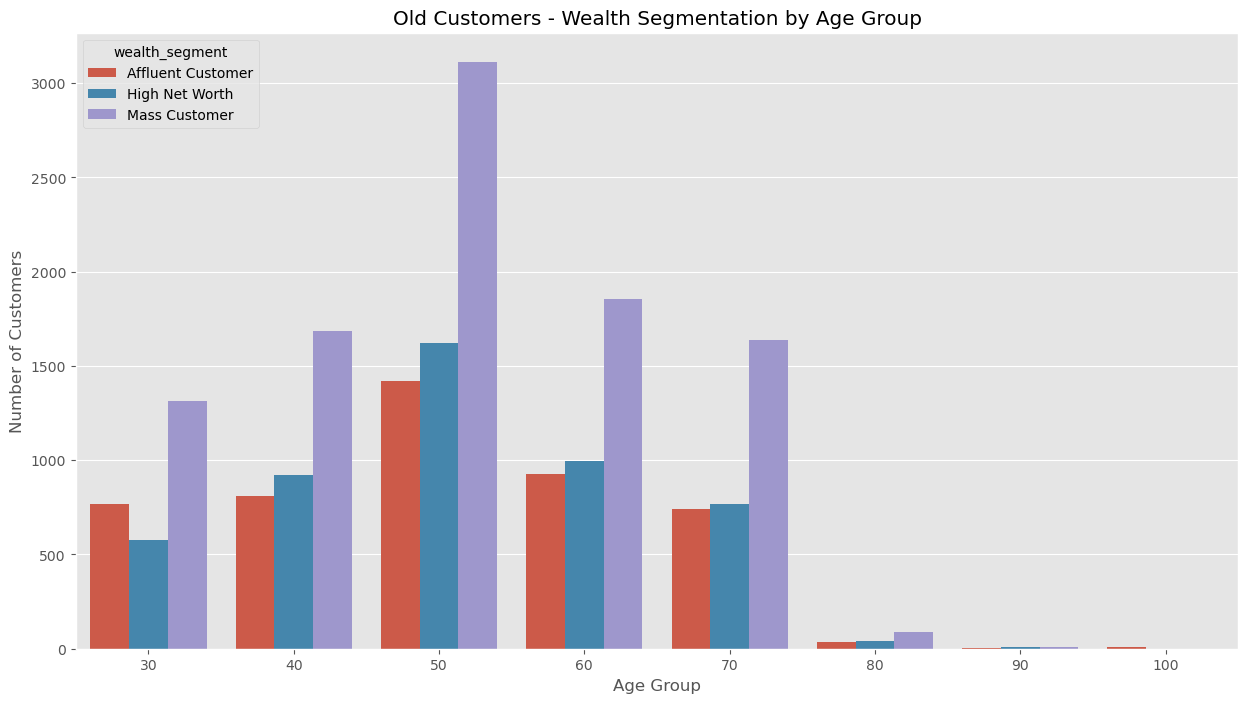

In [225]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age_Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.show()

In [226]:
# Loading the Customer Address Dataset.

cust_addr_info = pd.read_csv('CustomerAddress_Cleaned.csv')

In [227]:
# Merging the RFM data with Customer Address dataset.

cust_trans_addr = pd.merge(cust_trans_rfm , cust_addr_info, left_on = 'customer_id' , 
                           right_on = 'customer_id', how='inner')

In [228]:
print("RFM table Records count : {}\nAddress Table Records count :{}".format(cust_trans_rfm.shape[0] ,cust_addr_info.shape[0]))


RFM table Records count : 19354
Address Table Records count :3999


In [229]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()


In [230]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


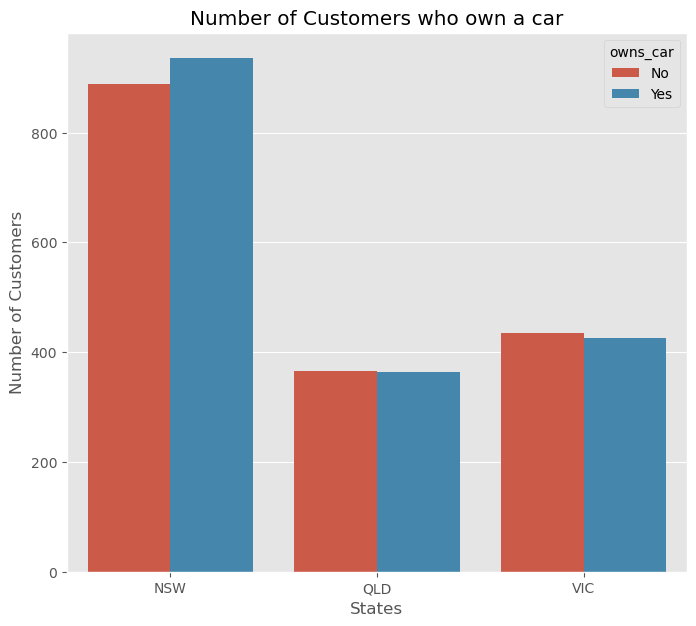

In [231]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners)
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()

<Figure size 800x700 with 0 Axes>

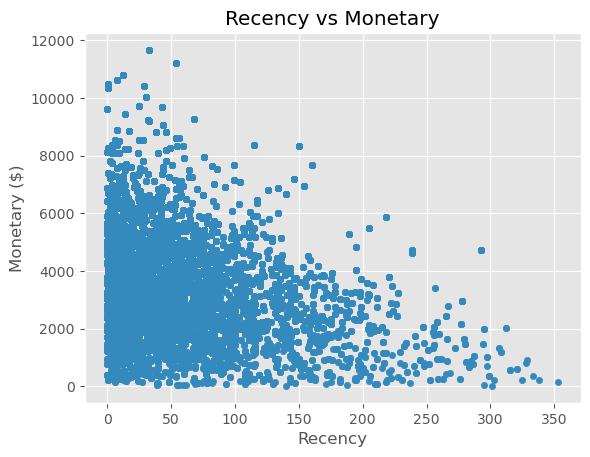

In [232]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

<Figure size 800x700 with 0 Axes>

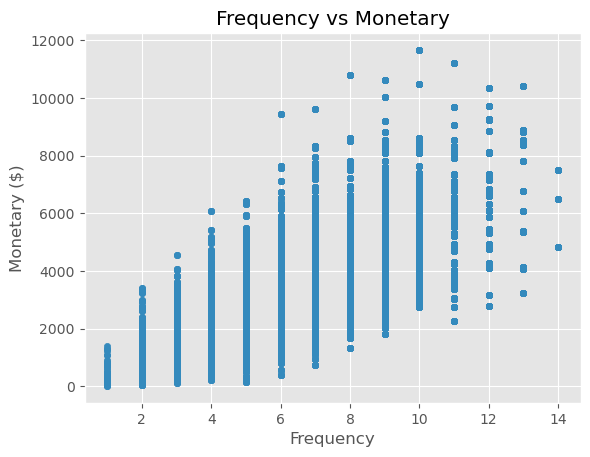

In [233]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

In [234]:
# Calculating the number of unique customers under a customer title.

cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [236]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,164
10,Very Loyal,2,181
1,Becoming Loyal,3,344
9,Recent Customer,4,357
8,Potential Customer,5,340
4,Late Bloomer,6,332
5,Loosing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388


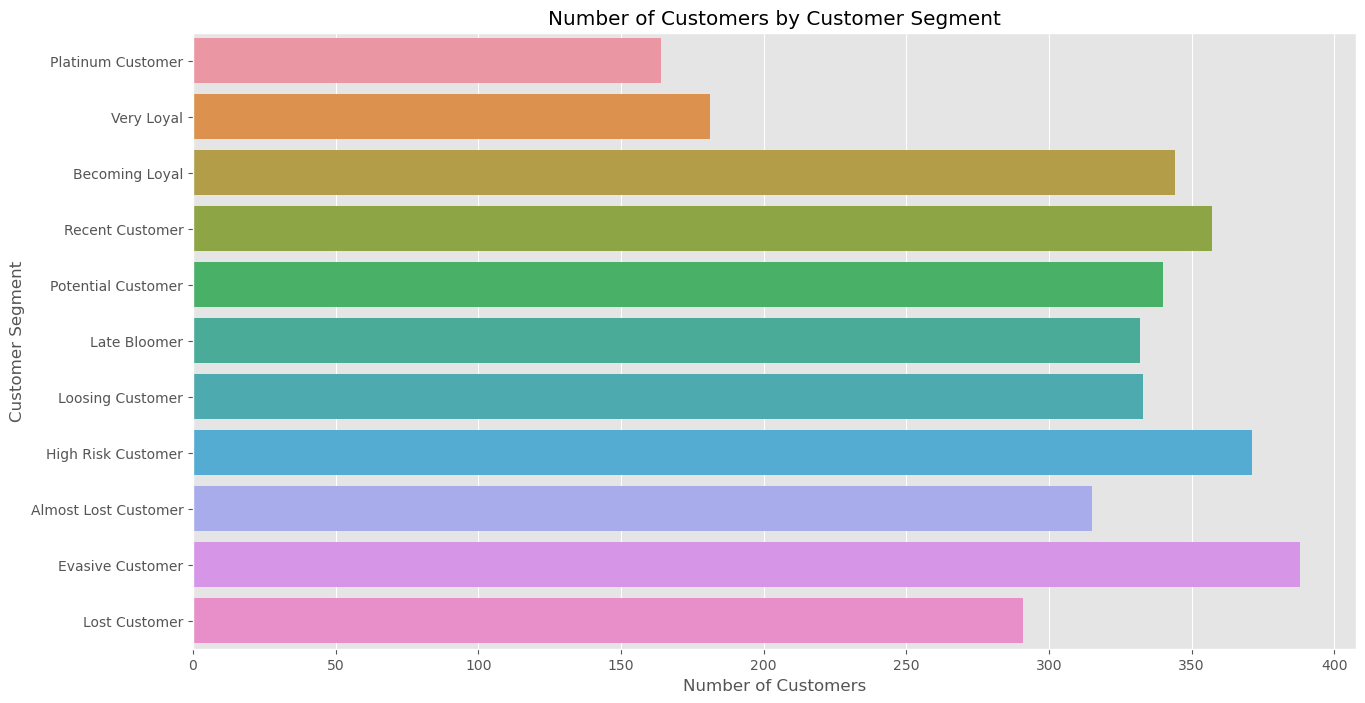

In [237]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()